<a href="https://colab.research.google.com/github/JackLaBarba/bread-log/blob/master/nutrional_yeast_tartine_experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# The Big Idea

Based on the https://www.seriouseats.com/2020/04/homemade-hand-pulled-noodles-lamian.html, I want to try using nutritional yeast as a dough relaxer in a tartine sourdough loaf. 

The Tartine Country Loaf recipe I normally use creates two loaves. I'll divide the loaves after autolyse, treat one as I normally do, but add nutritional yeast to the other.

I'll use half the concentration of nutrional yeast as that described in the SE article, since I don't want this loaf to turn into a block of silly putty.

# The Recipe

In [2]:
df = pd.DataFrame([
    ("flour", 425), 
    ("water", 285),
    ("nooch", 28)             
])
df.columns = ["component", "mass (g)"]
df = df.set_index("component")
df["bakers percentage"] = df["mass (g)"] / df.loc["flour"]["mass (g)"]
df

,mass (g),bakers percentage
component,,
flour,425,1.000000
water,285,0.670588
nooch,28,0.065882


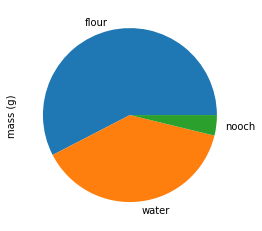

In [3]:
df["mass (g)"].plot(kind="pie")

In [4]:
df_tartine_autolyse = pd.DataFrame([
    ("flour", 1000), 
    ("water", 700),
    ("leaven", 200)            
])
df_tartine_autolyse.columns = ["component", "mass (g)"]
df_tartine_autolyse = df_tartine_autolyse.set_index("component")
df_tartine_autolyse['each loaf (g)'] = df_tartine_autolyse["mass (g)"] / 2
df_tartine_autolyse

,mass (g),each loaf (g)
component,,
flour,1000,500.0
water,700,350.0
leaven,200,100.0


In [5]:
autolyse_bread_mass = df_tartine_autolyse['mass (g)'].sum()
autolyse_bread_mass

1900

In [6]:
each_loaf = autolyse_bread_mass / 2
each_loaf

950.0

In [7]:
nooch_coef = 0.5 # use half of the baker's percentage of nooch as the lamian recipe
nooch_amount = df.loc['nooch']['bakers percentage'] * df_tartine_autolyse.loc['flour']['each loaf (g)'] * nooch_coef

df_tartine_nooch = pd.DataFrame([
    ("salt", 10), 
    ("water", 25+8),
    ("nooch", nooch_amount )
])
df_tartine_nooch.columns = ["component", "mass (g)"]
df_tartine_nooch = df_tartine_nooch.set_index("component")
df_tartine_nooch

df_tartine_reg = pd.DataFrame([
    ("salt", 10), 
    ("water", 25),
])
df_tartine_reg.columns = ["component", "mass (g)"]
df_tartine_reg = df_tartine_reg.set_index("component")
df_tartine_reg

,mass (g)
component,
salt,10
water,25


In [8]:
combined = pd.merge(df_tartine_autolyse, df_tartine_nooch, how="outer", 
                    left_index=True, right_index=True)
combined = pd.merge(combined, df_tartine_reg, how="outer", 
                    left_index=True, right_index=True)
combined.columns = [
    "both loaves autolyse (g)", 
    "each loaf autolyse (g)", 
    "nooch loaf post autolyse (g)",
    "reg loaf post autolyse (g)"
]
combined

,both loaves autolyse (g),each loaf autolyse (g),nooch loaf post autolyse (g),reg loaf post autolyse (g)
component,,,,
flour,1000.0,500.0,NaN,NaN
leaven,200.0,100.0,NaN,NaN
nooch,NaN,NaN,16.470588,NaN
salt,NaN,NaN,10.000000,10.0
water,700.0,350.0,33.000000,25.0


# Log

In [10]:
import numpy as np
timings = pd.DataFrame([
    ('Leaven Mixed', 
     pd.Timestamp('2020-06-26 20:00:00', tz='US/Eastern'), 
     75, 
     np.NaN, ),              
    ('Dough mixed', 
     pd.Timestamp('2020-06-27 09:00:00', tz='US/Eastern'), 
     75, 
     np.NaN, ),
    ('Final dough mixed', 
     pd.Timestamp('2020-06-27 10:00:00', tz='US/Eastern'), 
     80, 
     77, 
     """
     Split dough in two: one regular tartine recipe, other nooch loaf. I added
     8g water on the fly to the nooch loaf since the nooch seemed to soak up
     a fair amount of water, and lead to a dough that felt less hydrated. 8g
     gave me a dough that felt similar to the control loaf, as determined by
     its feel while mixing. Nooch loaf is slightly yellow, and already feels
     a little more extensible than control.
     """.strip()),
    ('Turn 1', 
     pd.Timestamp('2020-06-27 10:33:00', tz='US/Eastern'), 
     78, 
     78, 
     """
     """.strip()),
    ('Turn 2', 
     pd.Timestamp('2020-06-27 11:09:00', tz='US/Eastern'), 
     78, 
     78, 
     """
     """.strip()),
    ('Turn 3', 
     pd.Timestamp('2020-06-27 11:54:00', tz='US/Eastern'), 
     78, 
     78, 
     """
     """.strip()),
    ('Turn 4', 
     pd.Timestamp('2020-06-27 12:51:00', tz='US/Eastern'), 
     79, 
     78, 
     """
     """.strip()),
    ('First shaping', 
     pd.Timestamp('2020-06-27 14:13:00', tz='US/Eastern'), 
     79, 
     78, 
     """
     Nooch dough is a little slack--less elastic than control. Control still
     maintained some shape from final turn, but nooch didn't.
     """.strip()),
    ('Final shaping', 
     pd.Timestamp('2020-06-27 14:25:00', tz='US/Eastern'), 
     79, 
     78, 
     """
     Nooch dough has less structure. Stickier than control.
     """.strip()),
    ('Baking Nooch loaf', 
     pd.Timestamp('2020-06-27 17:50:00', tz='US/Eastern'), 
     79, 
     78, 
     """
     Nooch loaf had risen to fill banneton. Got a little stuck to the towel.
     A little goopy. We'll see...
     """.strip()),
])
timings.columns = ['step', 'time', 'ambient temp (F)', 'dough temp (F)', 'note']
timings['step duration'] = (timings['time'].shift(periods=-1) - timings['time'])
timings = timings.set_index('time')
timings

,step,ambient temp (F),dough temp (F),note,step duration
time,,,,,
2020-06-26 20:00:00-04:00,Leaven Mixed,75,NaN,None,13:00:00
2020-06-27 09:00:00-04:00,Dough mixed,75,NaN,None,01:00:00
2020-06-27 10:00:00-04:00,Final dough mixed,80,77.0,Split dough in two: one regular tartine recipe...,00:33:00
2020-06-27 10:33:00-04:00,Turn 1,78,78.0,,00:36:00
2020-06-27 11:09:00-04:00,Turn 2,78,78.0,,00:45:00
2020-06-27 11:54:00-04:00,Turn 3,78,78.0,,00:57:00
2020-06-27 12:51:00-04:00,Turn 4,79,78.0,,01:22:00
2020-06-27 14:13:00-04:00,First shaping,79,78.0,Nooch dough is a little slack--less elastic th...,00:12:00
2020-06-27 14:25:00-04:00,Final shaping,79,78.0,Nooch dough has less structure. Stickier than ...,03:25:00


# Results

Nooch loaf gained a lot of loft compared to control, the crumb was more even
and open. Alveoli was less glossy. Picked up a slight savory flavor from the nooch, but not overwhelming. I think the bread would still work in sweet settings (with jam, etc). Overall, pretty good!

[photo album](https://photos.app.goo.gl/R73vpf8ZAZ5Ham5H9)

Unfortunately I slightly burned both loaves, and the ferment was a little too
fast, owing to the hot temps in my house. I'd be interested in trying this again, esp. with a higher gluten content flour. Here I used KA unbleached AP (which I think is 13 or 14 percent gluten)